In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
%matplotlib inline

In [56]:
A_data = loadmat('X:/Course/压缩感知/datas/A.mat')
measurement_data = loadmat('X:/Course/压缩感知/datas/measurement1.mat')
sparse_data = loadmat('X:/Course/压缩感知/datas/sparse1.mat')

In [57]:
A_data = A_data.get('A') 
measurement_data = measurement_data.get('A')
sparse_data = sparse_data.get('x0')

In [58]:
measurement_data.shape, sparse_data.shape

((2048, 5616), (5616, 1))

## RIP

In [54]:
import scipy.io.wavfile as wf

sample_rate, sigs = wf.read('./datas/temp.wav')
times = abs(np.arange(sigs.size / 2 ) / sample_rate)
sigs = sigs[100000:105616, 0]
length = len(sigs)
index = list(range(length))
length

5616

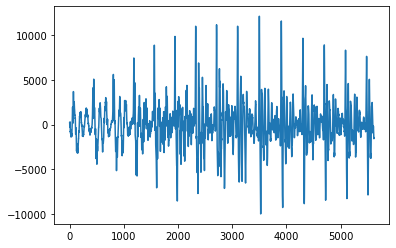

In [55]:
plt.plot(index, sigs)

$$c = \frac{1}{1 + \sqrt{k}}$$

$$M>cKlog\frac{N}{K}$$ </br>

$$(1-c)x^{2}_{2}<(Tx)_{2}^{2}<(1+c)x^{2}_{2}$$

In [156]:
mea_matrix = np.random.randn(2048, length)
# mea_matrix = measurement_data[...]
k = np.linalg.norm(sigs, ord=0, axis=0).item()
y_mea = np.dot(mea_matrix, sigs)
# c = 1 / (np.sqrt(k) + 1)
# print(c)
c = 0.002

norm2 = np.linalg.norm(sigs)
y2 = np.dot(y_mea.reshape(-1,1), sigs.reshape(1,-1))
(1-c)*norm2 < np.linalg.norm(y2) < (1+c)*norm2 

False

## OMP
---



In [1]:
"""
这一block内借用了网上的部分代码
"""
import numpy as np

def omp(y, Y, K):
    residual = y 
    M, N = Y.shape
    index = np.zeros(N, dtype=int)
    for i in range(N):
        index[i] = -1
    result = np.zeros((N, 1))
    for j in range(K):
        product = np.fabs(np.dot(Y.T, residual))
        pos = np.argmax(product)   
        index[pos] = 1
        my = np.linalg.pinv(Y[:, index>=0])
        a = np.dot(my, y)
        residual = y-np.dot(Y[:, index>=0], a)
    result[index>=0] = a
    index_nums = np.where(index>=0)

    return result, index_nums

In [19]:
X = np.array([[1,0,0,2,0,0,0,0]])
Y = loadmat('X:/Course/压缩感知/datas/OMP/matlab1.mat').get('A')
# Y.shape, X.shape

In [20]:
# 获得初始化y
y = np.dot(Y, X.T)
# 使用0范数求稀疏度
K = np.linalg.norm(X, ord=0, axis=1).item()

x_pre, candidate = omp(y, Y, int(K))
# print(x_pre, candidate)

error = np.linalg.norm(X-x_pre)/np.linalg.norm(X)
print('The error is:', error)

The error is: 3.521363372331802


In [21]:
def predict(X, Y):
    # 初始化
    y = np.dot(Y, X.T)
    # 稀疏度、迭代次数
    K = np.linalg.norm(X, ord=0, axis=1).item()
    # 计算结果
    x_pre, index = omp(y, Y, int(K))
    print('The result is: ', x_pre.T)

    return x_pre.T

predict(X, Y)

The result is:  [[1. 0. 0. 2. 0. 0. 0. 0.]]
The error is: 3.521363372331802


array([[1., 0., 0., 2., 0., 0., 0., 0.]])

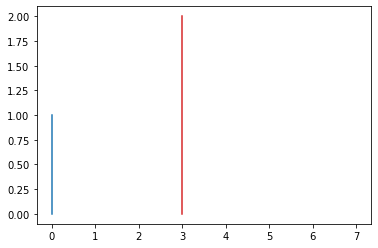

In [22]:
index = list(range(len(X[0])))
index
for i in index:
    plt.plot([i, i], [0, X[0,i]])

## 迭代的第一次

In [23]:
# 1. 初始化r0
r0 = np.dot(Y, X.reshape(8,1))

# 2. 求出最大列向量
datas = []
for col in range(Y.shape[0]):
    datas.append(np.dot(Y[col, :].reshape(1,8), X.reshape(8,1)))
index = np.argmax(datas)

# 3. 求出最小二乘解
A1 = Y[:, index]
x1_hat = np.matrix(np.dot(A1, A1.T)).I * np.dot(A1.T, r0)
x1_hat

# 4. 更新残差
r1 = r0 - np.dot(A1.reshape(4,1), x1_hat)
r1

matrix([[-2.84765426],
        [-0.45746126],
        [-1.19778756],
        [ 0.37494756]])

## 更换矩阵

The result is:  [[0.         0.         0.         0.         1.18221322 1.58430397
  1.08469573 0.        ]]
The error is: 2.7575758116812774
[[False  True  True False False False False  True]]


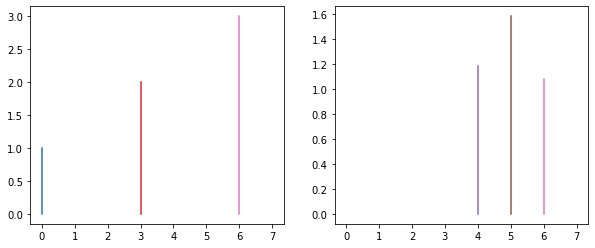

In [24]:
X2 = np.array([[1,0,0,2,0,0,3,0]])
X2_hat = predict(X2, Y)
print(X2 == X2_hat)

index = list(range(len(X[0])))

plt.figure(figsize=(10,4))
plt.subplot(121)
for i in index:
    plt.plot([i, i], [0, X2[0,i]])
    
plt.subplot(122)
for i in index:
    plt.plot([i, i], [0, X2_hat[0,i]])

### 条件判断

$$M>cKlog\frac{N}{K}$$ </br>
$$(1-c)x^{2}_{2}<(Tx)_{2}^{2}<(1+c)x^{2}_{2}$$

In [25]:
M = 3
(1/24)*3*np.log2((8/3)) < M

norm2 = np.linalg.norm(X2)
y2 = np.dot(Y, X2.T)
(1-1/24)*norm2 < np.linalg.norm(y2) < (1+1/24)*norm2 

False

In [26]:
Y2_new = np.random.randn(8, 8)
y2_new = np.dot(Y2_new, X2.T)
print(y2_new.shape)
# c = 1 / (np.sqrt(3) + 1)
X2_hat_new = predict(X2, Y2_new)
X2_hat_new

(8, 1)
The result is:  [[0.         0.38956819 0.         0.         0.62957779 0.
  2.75258788 0.        ]]
The error is: 3.06755098370384


array([[0.        , 0.38956819, 0.        , 0.        , 0.62957779,
        0.        , 2.75258788, 0.        ]])

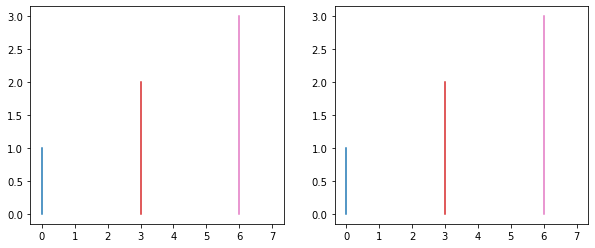

In [75]:
plt.figure(figsize=(10,4))
plt.subplot(121)
for i in index:
    plt.plot([i, i], [0, X2[0,i]])
    
plt.subplot(122)
for i in index:
    plt.plot([i, i], [0, X2_hat_new[0,i]])

In [74]:
Y2_new_2 = np.random.randn(8, 8)
X2_hat_new = predict(X2, Y2_new_2)
X2_hat_new

The result is:  [[1. 0. 0. 2. 0. 0. 3. 0.]]
The error is: 3.295017884191656


array([[1., 0., 0., 2., 0., 0., 3., 0.]])